link to github: https://github.com/nimoror/Assignment2_CSS
Contribution statement
* Part 1: Oliver 50% Nicco 25% Caro: 25%
* Part 2: Oliver 25% Nicco 50% Caro: 25%
* Part 3: Oliver 25% Nicco 25% Caro: 50%

# Assignment 2

## Part 1: Mixing Patterns and Assortativity

In [3]:
#imports
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors
import math
import statistics
import random
from scipy.stats import ttest_1samp

In [4]:
#Import the network
G = nx.read_gpickle("css_graph.gpickle")
#Extarct the largets connected component from the network and save it as the new network
components = list(nx.connected_components(G))
largest_component = max(components, key=len)
G = G.subgraph(largest_component)

* For each node, compute the fraction of edges that connect to a node that works in the same top field. Find the average value across all nodes.

In [5]:
#Make all missing top_fields = None
for author in G.nodes:
    if 'top_field' not in G.nodes[author]:
        G.nodes[author]['top_field'] = None

In [6]:
#Compute average neighboors in same top field as each node
def network_mean_same_field(top_fild_name):
    for author in G.nodes:
        G.nodes[author]['Avr_same_field'] = mean_same_field = statistics.mean(map(int, [G.nodes[author][top_fild_name] == field for field 
              in [G.nodes[neighboor][top_fild_name] for neighboor 
                  in G.neighbors(author)]]))
    
    #network average
    network_mean = statistics.mean(map(float, [G.nodes[author]['Avr_same_field'] for author in G.nodes]))
    return network_mean

network_mean = network_mean_same_field('top_field')
print('The network mean of the fraction of connections to authors in the same field is: ' + str(network_mean))
print('Here is a subset of the fractions of connections to authors in the same field')
list(nx.get_node_attributes(G, "Avr_same_field").items())[:5]

The network mean of the fraction of connections to authors in the same field is: 0.3918154061737561
Here is a subset of the fractions of connections to authors in the same field


[('1759771', 0.55),
 ('1903596', 0),
 ('3456882', 0.42857142857142855),
 ('8554587', 0.125),
 ('36663090', 0.36363636363636365)]

* Repeat the point above 100 times (at least). Plot the distribution of the values obtained and compare it with the value you have found for the real graph. Is the chance to connect to a member of the same field significantly higher than it would be by chance?

In [7]:
#Create a function to randomise the top fields node assignments
top_fields = list(nx.get_node_attributes(G, "top_field").values())
def randomise_top_fields_rand():
    random.shuffle(top_fields)
    for i, author in enumerate(G.nodes):
        G.nodes[author]['top_field_rand'] = top_fields[i]

In [8]:
#Compute average neighboors in same top field as each node 100 times for random top fields
rand_means = []
for i in range(100):
    randomise_top_fields_rand()
    rand_means.append(network_mean_same_field('top_field_rand'))

In [45]:
#compute the p-value for the null-hypothesis that out network mean occured by random... The p-value is extreemly low
t_stat, p_value = ttest_1samp(rand_means, network_mean)
print("For the null hypothesis that our network mean occured by random we get the following p-value")
print('p-value:' + str(p_value))

For the null hypothesis that our network mean occured by random we get the following p-value
p-value:5.442386916127892e-131


> The low p-value tells us that it is extremely unlikely that our high netwrok_mean has occured by random and we therefore conlcude that there is a relationsship between which field an author is working in and which field his neighboors (the authors he has written papers with) are in.

* Compute the assortativity coefficient with respect to author's field. How do you interpret the value you obtain? (Hint: See this paper, eq (2)). Important: here I do not want you to use the NetworkX implementation, but rather to implement your own version of the measure.

In [52]:
#make own implementation of the assoritivty function from eq2 in given paper
def assortivity_wrt_attr(G, attr_dict):
    unique_attr = set(list(attr_dict.values()))
    m = G.number_of_edges()
    
    Mix = np.zeros((len(unique_attr), len(unique_attr)))
    for i, att_i in enumerate(unique_attr):
        for j, att_j in enumerate(unique_attr):
            Mix[i,j] = len([(ie, je) for ie, je in G.edges() if attr_dict[ie] == att_i and attr_dict[je] == att_j])
    e = Mix/m
    r = (np.trace(e) - np.sum(np.dot(e,e))) /(1 - np.sum(np.dot(e,e)))
    
    return r

In [53]:
# Get a dictionary of the top_fields and compute assortivity
top_field_dict = nx.get_node_attributes(G, 'top_field')
r_top = assortivity_wrt_attr(G, top_field_dict)
print('The assortivity wrt the authors top field is ' + str(r_top))

The assortivity wrt the authors top field is 0.1824126167000522


> That the assoritvity value with respect to the authors top fields is 0.18 and therefore above 0, which tells us that authors are more likely to be connected with authors of the same top field than we would expect if the authors' top fields were randomly assigned but with the same amount of each field and the same number of edges which would have a value of 0.

* Compute the assortativity coefficient with respect to author's field. How do you interpret the value you obtain? (Hint: See this paper, eq (2)). Important: here I do not want you to use the NetworkX implementation, but rather to implement your own version of the measure.

In [57]:
# Compute the assortivity wrt. degree
r_degree = nx.degree_assortativity_coefficient(G)
print('The assortivity wrt the degree is ' + str(r_degree))

The assortivity wrt the degree is 0.03273113319546212


> That the assoritvity value with respect to degree is 0.03 and therefore only tiny bit above 0, which tells us that there is barely any correlation between the authors' degrees and who they are connected to. So no high-degree scientists do not tend to link to other high-degree scientists, and neither do low-degree scientists to other low-degree scientists. We interpret this as showing that well connected css scientists are not isolated to an exclusive club of other well connected css scientists but are also connected to less connected scientists.

## Part 2: Communities

## Zachary's karate club:

1. Visualize the graph using netwulf. Set the color of each node based on the club split (the information is stored as a node attribute).

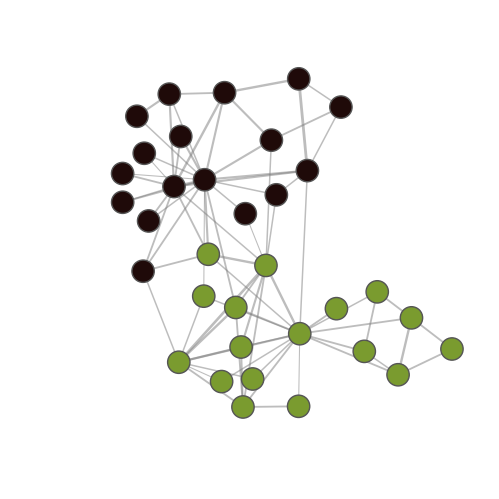

In [59]:
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw

# Draw the graph with node colors
G = nx.karate_club_graph()
dict = nx.get_node_attributes(G,'club')
nx.set_node_attributes(G,dict,"group")
results = nw.visualize(G)

2. Write a function to compute the modularity of a graph partitioning (use equation 9.12 in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.

In [60]:
#Own function of modularity
def compute_modularity(G, partition):
    m = G.number_of_edges()
    Q = 0
    for c in set(partition.values()):
        Lc = [(i, j) for i, j in G.edges() if partition[i] == c and partition[j] == c]
        k_c = sum([G.degree[i] for i in G.nodes() if partition[i] == c])
        L = [(i, j) for i, j in G.edges()]
        Q += len(Lc)/len(L) - (k_c/(2*len(L)))**2
    return Q


3. Explain in your own words the concept of modularity.

> The cocnept of Modularity originates from  adesire to know how well a netwrok has been divided into smaller groups i.e. how good is this specific pertioning. The modularity of a network partitioning is a measure of how well it is split into communities. It compares the number of edges within communities to the expected number of edges inside the communities if the network were randomly wired. The higher the modularity score, the better the partitioning i.e. this more edges are inside the communities than we would expect by random. It ranges from -1 to 1, where a score of 1 indicates a perfect partitioning and a score of 0 indicates a random partitioning i.e. not more edges inside communities than there would be by random.

4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a node attribute, called "club".

In [61]:
partition = nx.get_node_attributes(G, 'club')
modularity = compute_modularity(G, partition)
print(f"The modularity of the Karate Club split partitioning is {modularity}")

The modularity of the Karate Club split partitioning is 0.3582347140039447


5. We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from 0. To do so, we will implement the double edge swap algorithm. Given a network G, this algorithm creates a new network, such that each node has exactly the same degree as in the original network, but different connections. Here is the algorithm

6. Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same. (see error check inside algorithm implementation)


In [95]:
import random
import copy

def double_edge_swap(G):
    N = len(G.edges()) 
    # a. Create an identical copy of your original network.
    G_new = copy.deepcopy(G)
    nodes = list(G.nodes()) # list of nodes in the network

    for i in range(int(N*2.1)):
        # b. Consider two edges in your new network (u,v) and (x,y), such that u!=v and v!=x.
        edges = list(G_new.edges()) 
        # choose two random edges
        e1, e2 = random.sample(edges, 2)
        u, v = e1
        x, y = e2

        # make sure the chosen edges are not adjacent
        if (u != v) and (v != x) and (v != y) and (u != x) and (u != y) and (x != y) and (u, y) not in edges and (x, v) not in edges and (y, u) not in edges and (v, x) not in edges:
            # c. If none of edges (u,y) and (x,v) exists already, add them to the network and remove edges (u,v) and (x,y).
            G_new.add_edge(u, y)
            G_new.add_edge(x, v)
            G_new.remove_edge(u, v)
            G_new.remove_edge(x, y)
        
        # Repeat steps b. and c. to achieve at least N swaps (I suggest N to be larger than the number of edges).
    
    # 6. Double check that your algorithm works well, by showing that the degree of nodes in the 
    # original network and the new 'randomized' version of the network are the same.
    
    if not list(G_new.degree()) == list(G.degree()):
        raise ValueError("degree of nodes in the OG network and rand version are not the same")
    return G_new


7. Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.

In [96]:
partition = nx.get_node_attributes(G, 'club')
modularities = []
for i in range(1000):
    G_new = double_edge_swap(G)
    modularities.append(compute_modularity(G_new,partition))

8. Compute the average and standard deviation of the modularity for the random network.

In [97]:
modularities = np.array(modularities)
modularities_std = np.std(modularities)
modularities_mean = np.mean(modularities)
print(f"modularities random networks std = {modularities_std}")
print(f"modularities random networks mean = {modularities_mean}")

modularities random networks std = 0.047648442744642555
modularities random networks mean = -0.011790927021696316


9. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).

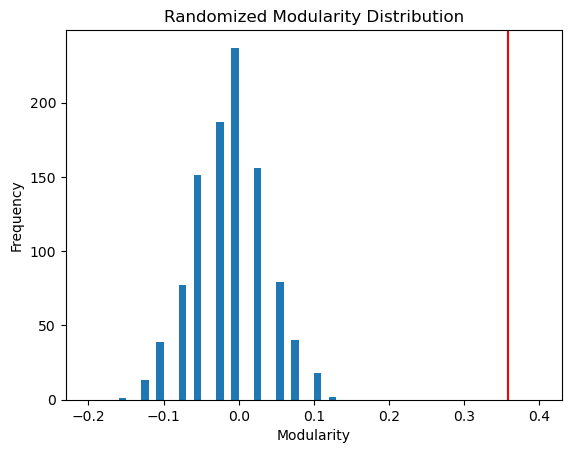

In [98]:
fig, ax = plt.subplots()
bins = np.arange(-0.2, 0.4, 0.01)
ax.hist(modularities, bins=bins)
ax.axvline(x=modularity, color='r')
ax.set_xlabel("Modularity")
ax.set_ylabel("Frequency")
ax.set_title("Randomized Modularity Distribution")
plt.show()

10. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?

> Conclusion: The club split is a good partitioning, since it keeps many edges inside each of the 2 communities, compared to what one would expect at randomm, as one can see in the graph above. There are no random networks that have madularity scores in the same order of magnitude. We performed the random experiments because it enables us (with the results we have gottten) to reject the null hypotheiss that the high modularity we get from the club partitioning has occured by random. The reason we keep the node degrees constant is that the modularity scores that you would expect to see by random depends on the node degrees. It is for example much harder to do a good partitioning if you have some nodes with very high degrees taht are connected to all other nodes. Therefore, to do a fair comparisson with the random networks the node degrees much be kept constant.

11. Use the Python Louvain-algorithm implementation to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

In [101]:
import community as community_louvain


In [104]:
# Extract communities with the Louvain-algorithm
partition = community_louvain.best_partition(G)

# Compute the modularity
modularity = community_louvain.modularity(partition, G)

print('Modularity of partitioning:', modularity)


Modularity of partitioning: 0.4438541256723075


> The Lovain-algorithm gave us a higher higher modularity than the one we found above for the club partitioning. This comparisson reveals that even though the club split is a good partitioning, there exists a partitioning which have even more egdes inside the communities than what you would expect to see if the egdes where randomly assigned.

12. Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix D with dimension (2 times A), where A is the number of communities found by Louvain. We set entry D(i,j) to be the number of nodes that community i has in common with group split j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

In [105]:
groups_club = 2
groups_louvin = 4
D = np.zeros(groups_club*groups_louvin).reshape(groups_louvin,groups_club)
for i, club in enumerate(list(set(partition.values()))):
    for j, group_name in enumerate(list(set(nx.get_node_attributes(G, "club").values()))):
        D[i,j] = sum(partition[x] == club and nx.get_node_attributes(G, "club")[x] == group_name for x in list(G.nodes()))
print("Confusion matrix for groups")
D

Confusion matrix for groups


array([[ 0., 11.],
       [ 0.,  5.],
       [ 4.,  0.],
       [13.,  1.]])

> As we can see from the confusion matrix, the communities we have detected with the Louvain algorithm correspond very well to the club partitioning, as it seperates the two clubs perfectly, except for 1 person, and then just divides each club into two smaller subgroups.

## Community detection on the network of Computational Social Scientists

* Consider the network you built in Week 4.

In [110]:
import networkx as nx
import community
import netwulf as nw

#Import the network
G = nx.read_gpickle("css_graph.gpickle")
#Extarct the largets connected component from the network and save it as the new network
components = list(nx.connected_components(G))
largest_component = max(components, key=len)
G = G.subgraph(largest_component)

* Use the Python Louvain-algorithm implementation to find communities. How many communities do you find? What are their sizes? Report the value of modularity found by the algorithm. Is the modularity significantly different than 0?

The number of communities are: 48
The modularity is :  0.9226196257999626  Whcih is significantly above 0


<function matplotlib.pyplot.show(close=None, block=None)>

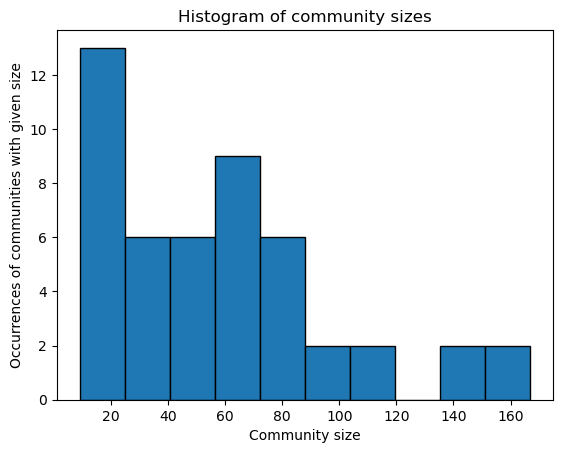

In [142]:
# Find communities using the Louvain algorithm
partition = community.best_partition(G)

# Compute the modularity of the partition
modularity = community.modularity(partition, G)

#Compute then number of communities
n_comm = len(set(partition.values()))

# Print the modularity value
print('The number of communities are:', str(n_comm))
print('The modularity is : ', modularity, " Whcih is significantly above 0")

#Create histogram showing community size distribution
count_dict = {}

# Loop over the values of the dictionary
for value in partition.values():
    if value in count_dict:
        count_dict[value] += 1
    else:
        count_dict[value] = 1
        
plt.hist(count_dict.values(), edgecolor='black')
plt.xlabel('Community size')
plt.ylabel('Occurrences of communities with given size')
plt.title('Histogram of community sizes')
plt.show

* Visualize the network, using netwulf (see Week 5). This time assign each node a different color based on their community. Describe the structure you observe.

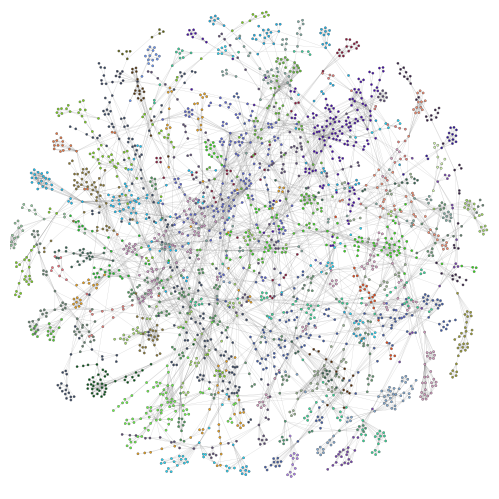

In [144]:
# Visualization using netwulf
nx.set_node_attributes(G,partition,"group")

#Write community assignment to txt for later use
with open('partition.txt', 'w') as file:
    for node, community in partition.items():
        file.write(str(node) + ',' + str(community) + '\n')

results = nw.visualize(G)

> As we cn see on the structure above, we have a few larger communities, for example the purple in the top right and the light blue all the way to the left. Wee see that there are many connection within these cluster but also going out of them which suggests that they consist of some quite connected people. We also see many smaller communities where most members are only connected within their own community

## Part 3: TF-IDF

### Exercise 4: TF-IDF and the Computational Social Science communities.

In [11]:
import pandas as pd
import json
import numpy as np
from ast import literal_eval

#Dataframe communities week 6 part 4
with open('partition.txt') as f:
    data = f.read()
    
data_into_list = data.split("\n")
f.close()

id_list = []
com_list = []
for x in data_into_list:
    i = x.split(',')
    try:
        com_list.append(int(i[1]))
        id_list.append(i[0])
    except:
        pass


dct = {w: x for w, x in zip(id_list, com_list)}
cdict = {k: v for k, v in sorted(dct.items(), key=lambda item: item[1])}
df_com = pd.DataFrame.from_dict(cdict, orient = 'index')

#Dataframe with tokens week 7 exercise 2
df_papers = pd.read_csv('Papers_AbsTokens.txt', index_col=0)
df_papers.index = df_papers.index + 1
df_papers = df_papers.drop(df_papers.columns[0], axis=1)
df_tokens = df_papers[['authorIds', 'Tokens Abstract']].copy()


In [12]:
#create dataframe with only authorIds and tokens since we only need these two columns

a_list = df_tokens['authorIds'].values.tolist()
arr_list =[]
for i in a_list:
    arr_list.append(literal_eval(i))

df_tokens['authorIds'] = arr_list

#use explode for author ids 
dfe = df_tokens.explode('authorIds')

### 1. First, check out the wikipedia page for TF-IDF. Explain in your own words the point of TF-IDF.

### What does TF stand for?

>TF stands for term frequency

### What does IDF stand for?

>IDF stands for inverse document frequency

### 2. Now, we want to find out which words are important for each community, so we're going to create several *large documents, one for each community*. Each document includes all the tokens of abstracts written by members of a given community.

In [13]:
#dictionary with communities as keys, and authorIds as values then to list. 
# Pass communities' dictionary as list, and the same for df_tokens
# Then create a dictionary with authors and its tokens grouped by community

res = {}
for i, v in cdict.items():
    res[v] = [i] if v not in res.keys() else res[v] + [i]

cv = [v for v in res.values()]

#list with authors ids and tokens
ta = dfe['Tokens Abstract'].tolist()
aid = dfe['authorIds'].tolist()

taf = []
for i in ta:
    try:
        taf.append(literal_eval(i))
    except:
        pass
    
tlist = list(zip(aid,taf))

#create arrays with tokens grouped by communities

cabs=[]
for x in cv:
    abst=[]
    for i in x:
        n=0
        while n<len(tlist):
            if i == tlist[n][0]:
                for w in tlist[n][1]:
                    abst.append(w)
            n+=1
            
        cabs.append(abst)      

In [14]:
#dataframe by communities with authors and tokens
dfc = pd.DataFrame(cl,columns = ['Community', 'Authors'] )
dfc['Abstract Tokens'] = cabs
dfc.head(10)

,Community,Authors,Abstract Tokens
0,0,"[1759771, 1903596, 2302886, 143644649, 3339206...","[benchmarks, glue, helped, drive, advances, nl..."
1,1,"[2165806744, 49514391]",[]
2,2,"[3456882, 8554587, 1744513, 51115231, 90599671...","[numerous, studies, shown, person, 's, health,..."
3,3,"[1723388, 2912767, 144695689]",[]
4,4,"[36663090, 3303970, 103273315, 1863307, 180924...","[large-scale, organizations, decentralized, po..."
5,5,"[1705932, 1739555, 143891260, 2191921580, 2193...",[]
6,6,"[1712423, 2419880, 3298708, 2532973, 31674115,...","[``, small, world, phenomenon, '', popularized..."
7,7,"[145915985, 143923082, 144446128, 116246950, 1...",[]
8,8,"[2185834426, 2351618, 30421024, 2752996, 14363...","[social, influence, plays, major, role, politi..."
9,9,"[1387936232, 119464741, 148176877, 2310860, 43...","[predicting, infectious, disease, help, reduce..."


### 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the top 5 communities (by number of authors).

In [98]:
# get top 5 communities
import itertools
from collections import OrderedDict

communities = dict(OrderedDict(sorted(res.items(), key=lambda x: len(x[1]),reverse=True)))
topc = list(dict(itertools.islice(communities.items(), 5)).keys())
top5abs = []

for i in topc:
    top5abs.append(cabs[i])

In [103]:
#Term Frequency
def termfreq(abs_list, word_set):
    
    tf_abs = []
    tf_com = []
    for abst in abs_list:
        for word in word_set:
            N = len(abst)
            occurance = len([token for token in abst if token == word])
            tf = occurance/N
            tf_abs.append([word, tf])
    return tf_abs

#TF top 5
text = [item for sublist in top5abs for item in sublist]
word_set = []

for word in text:
    if word not in word_set:
        word_set.append(word)

#Set of vocab 
word_set = set(word_set)

tf_5 = termfreq(top5abs, word_set)
sortl = sorted(tf_5)

In [104]:
#tf_5[0]
tf_5.sort(key = lambda x: x[1], reverse= True)
tf_5[:10]

[['data', 0.010192837465564738],
 ['farmers', 0.008815426997245178],
 ['observational', 0.008254356465912565],
 ['study', 0.007642922653622745],
 ['data', 0.007186606778276847],
 ['adoption', 0.007162534435261708],
 ['social', 0.007083181983290956],
 ['using', 0.006887052341597796],
 ['used', 0.006725771935188016],
 ['methods', 0.0064200550290431065]]

### Describe similarities and differences between the communities.

> We can see how these communities share big weigh with the words data, farmers, observational, study, adoption, social and methods
> It can be assumed that these top communities share data research on farmers.

### Why aren't the TFs not necessarily a good description of the communities?
> Checking the TF will only give us information on how much the word is being used, but since these communities all share computational social science papers, words like data or methods will be used more frequently independtly of what the research is about.

In [92]:
# IDF 
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count
 
word_count = count_dict(top5abs)
total_documents = len(top5abs)

def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

idfl = []
for abst in top5abs:
    for word in abst:
        idf = inverse_doc_freq(word)
        idfl.append([word,idf])

In [107]:
sortidl = sorted(idfl)

### What base logarithm did you use? Is that important?
#### It was used a base of 10 for this logarithm, which is the common logarithm that is needed for this computation 

In [123]:
#Term Frequency
def termfreq9(abs_list, text):
    
    tf_abs = []
    tf_com = []
    wordsl =[]
    
    for word in text:
        if word not in wordsl:
            wordsl.append(word)
        
     #Set of vocab 
    wordsl = set(wordsl)
    
    for abst in abs_list:
        for word in wordsl:
            N = len(abst)
            occurance = len([token for token in abst if token == word])
            tf = occurance/N
            tf_abs.append([word, tf])
            
    return tf_abs,wordsl

In [128]:
#Top 9
topc = list(dict(itertools.islice(communities.items(), 9)).keys())
top9abs = []

for i in topc:
    top9abs.append(cabs[i])

tf9 =[]
tokens_set=[]
for text in top9abs:
    tf_9,wordsl = termfreq9(top5abs, text)
    tokens_set.append(wordsl)
    sortl = sorted(tf_9)
    #tf_9.sort(key = lambda x: x[1], reverse= True)
    tf9.append(tf_9)

In [129]:
i=0
for x in tf9:
    print(f'Community {i}:')
    print(x[:10])
    i+=1

Community 0:
[['round', 0.0002449979583503471], ['simulation', 8.166598611678236e-05], ['galleries', 0.00016333197223356472], ['decade', 0.0002449979583503471], ['procedure', 0.0002449979583503471], ['personalized', 8.166598611678236e-05], ['broader', 0.0004899959167006942], ['epidemiology', 8.166598611678236e-05], ['vilify', 8.166598611678236e-05], ['area', 8.166598611678236e-05]]
Community 1:
[['round', 0.0002449979583503471], ['simulation', 8.166598611678236e-05], ['fig', 0.0], ['decade', 0.0002449979583503471], ['procedure', 0.0002449979583503471], ['population-level', 0.0], ['forward‐thinking', 0.0], ['intentions', 0.0], ['abbott', 0.0], ['broader', 0.0004899959167006942]]
Community 2:
[['encompassed', 0.0], ['simulation', 8.166598611678236e-05], ['aggregators', 0.0], ['performers', 0.0], ['autocorrelation', 0.0], ['whereas', 0.0], ['area', 8.166598611678236e-05], ['putting', 0.0], ['analysesusea', 0.0], ['universities', 0.0]]
Community 3:
[['round', 0.0002449979583503471], ['∗we'

In [136]:
# IDF
def count_dict(sentences, sets):
    word_count = {}
    for word in sets:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count

words = []
for sets in tokens_set:
    count_dict(top5abs,sets)
    words.append(count_dict(top5abs,sets))
    
total_documents = len(top9abs)

def inverse_doc_freq(word, words):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

idf9 =[]
for text in top9abs:
    idfl = []
    for word in text:
        for x in words:
            idf = inverse_doc_freq(word,x)
            idfl.append([word,idf])
    idf9.append(idfl)

In [137]:
len(idf9)

9

In [140]:
n=0
w = 0
tfid9=[]
for x in tf9:
    tf_idfl =[]
    while n< (len(x)):

        tf_idf =x[n][1]*idf9[w][n][1]
        tf_idfl.append([x[n][0],tf_idf])
        n+=1
    tfid9.append(tf_idfl)    
    w+=1

In [ ]:
#Top 10 TF-IDF words

In [142]:
i=0
for x in tfid9:
    print(f'Community {i}:')
    print(x[:10])
    i+=1

Community 0:
[['round', 0.0001440065328465788], ['simulation', 4.800217761552626e-05], ['galleries', 9.600435523105252e-05], ['decade', 0.0001440065328465788], ['procedure', 0.0001440065328465788], ['personalized', 4.800217761552626e-05], ['broader', 0.0002880130656931576], ['epidemiology', 4.800217761552626e-05], ['vilify', 4.800217761552626e-05], ['area', 0.00012283196380369736]]
Community 1:
[['therein', 0.0], ['growth', 0.0], ['find', 0.0017811717118246032], ['lengths', 0.0], ['scaling', 0.0], ['autonomy', 0.0], ['confirmed', 0.0], ['certainly', 0.0], ['majority', 0.0003238494021499278], ['conventions', 0.0]]
Community 2:
[]
Community 3:
[]
Community 4:
[]
Community 5:
[]
Community 6:
[]
Community 7:
[]
Community 8:
[]


#### Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?
> IDF is the measure of how significant the word is in the whole corpus,so the words presented are very descriptive of its communities

### Exercise 5: The Wordcloud

#### Install the WordCloud module.

In [ ]:
pip install wordcloud

#### Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.

In [ ]:
wc = WordCloud(max_font_size=50, max_words=100, background_color="white")

for a in topabs:
    img = wc.generate_from_text(' '.join(a))
    plt.imshow(img, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration).

In [ ]:
# First, convert the "authorIds" lists into separate rows
df_expanded = df_papers.explode('authorIds')

# Next, group by 'authorIds' and calculate the sum of 'citationCount' for each ID
citation_sum = df_expanded.groupby('authorIds')['citationCount'].sum().reset_index()

#Calculate the citation count for each authorId:
import ast
df_papers_new = df_papers
df_papers_new['authorIds'] = df_papers_new['authorIds'].apply(lambda x: ast.literal_eval(x))
# Next, convert the "authorIds" lists into separate rows
df_expanded = df_papers.explode('authorIds')
# Group by 'authorIds' and calculate the sum of 'citationCount' for each ID
citation_sum = df_expanded.groupby('authorIds')['citationCount'].sum().reset_index()
citation_sum

In [ ]:
#Find the authors with the highest cumulative citation count in each community:

df_com_new = df_com
df_com_new = df_com_new.reset_index()
df_com_new.rename(columns={ df_com_new.columns[0]: "authorIds" }, inplace = True)
df_com_new

# Merge 'df_com' and 'citation_sum' DataFrames on authorIds
merged_df = pd.merge(df_com_new, citation_sum, left_on='authorIds', right_on='authorIds')
merged_df.rename(columns={ merged_df.columns[1]: "community" }, inplace = True)


# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['community', 'authorIds', 'highestCitationCount'])

# Iterate over the values in 'topc'
for value in topc:
    # Filter the merged_df by the current value in 'topc'
    filtered_df = merged_df[merged_df['community'] == value]

    # Find the authorId with the highest citationCount
    if not filtered_df.empty:
        top_5_authors = filtered_df.nlargest(5, 'citationCount')

        # Append the result to the 'results' DataFrame
        results = results.append(top_5_authors[['community', 'authorIds', 'citationCount']], ignore_index=True)

results = results.drop(['highestCitationCount'], axis=1)
results

> We didn't manage our time well enough to add the author names.

#### Comment on your results. What can you conclude on the different sub-communities in Computational Social Science?
> There is a strong overlap in the words used in these communities. This is reasonable as we are looking at the same field. However, some different focus can be seen between the communitites. While the words model, data, social and agent are prevalent in most communitites, some commmunities have a different focus. For instance one community seems to be less reliant on models and working more with "empirical" studies. Another community has a strong focus on institutions ("institutional") and policy or politics ("political").

#### Look up online the top author in each community. In light of your search, do your results make sense?